# TFG: Notebbok 2.5
Adding EasyOCR tokens to images metadata
---

Each item in the json file has the following structure:

<div>
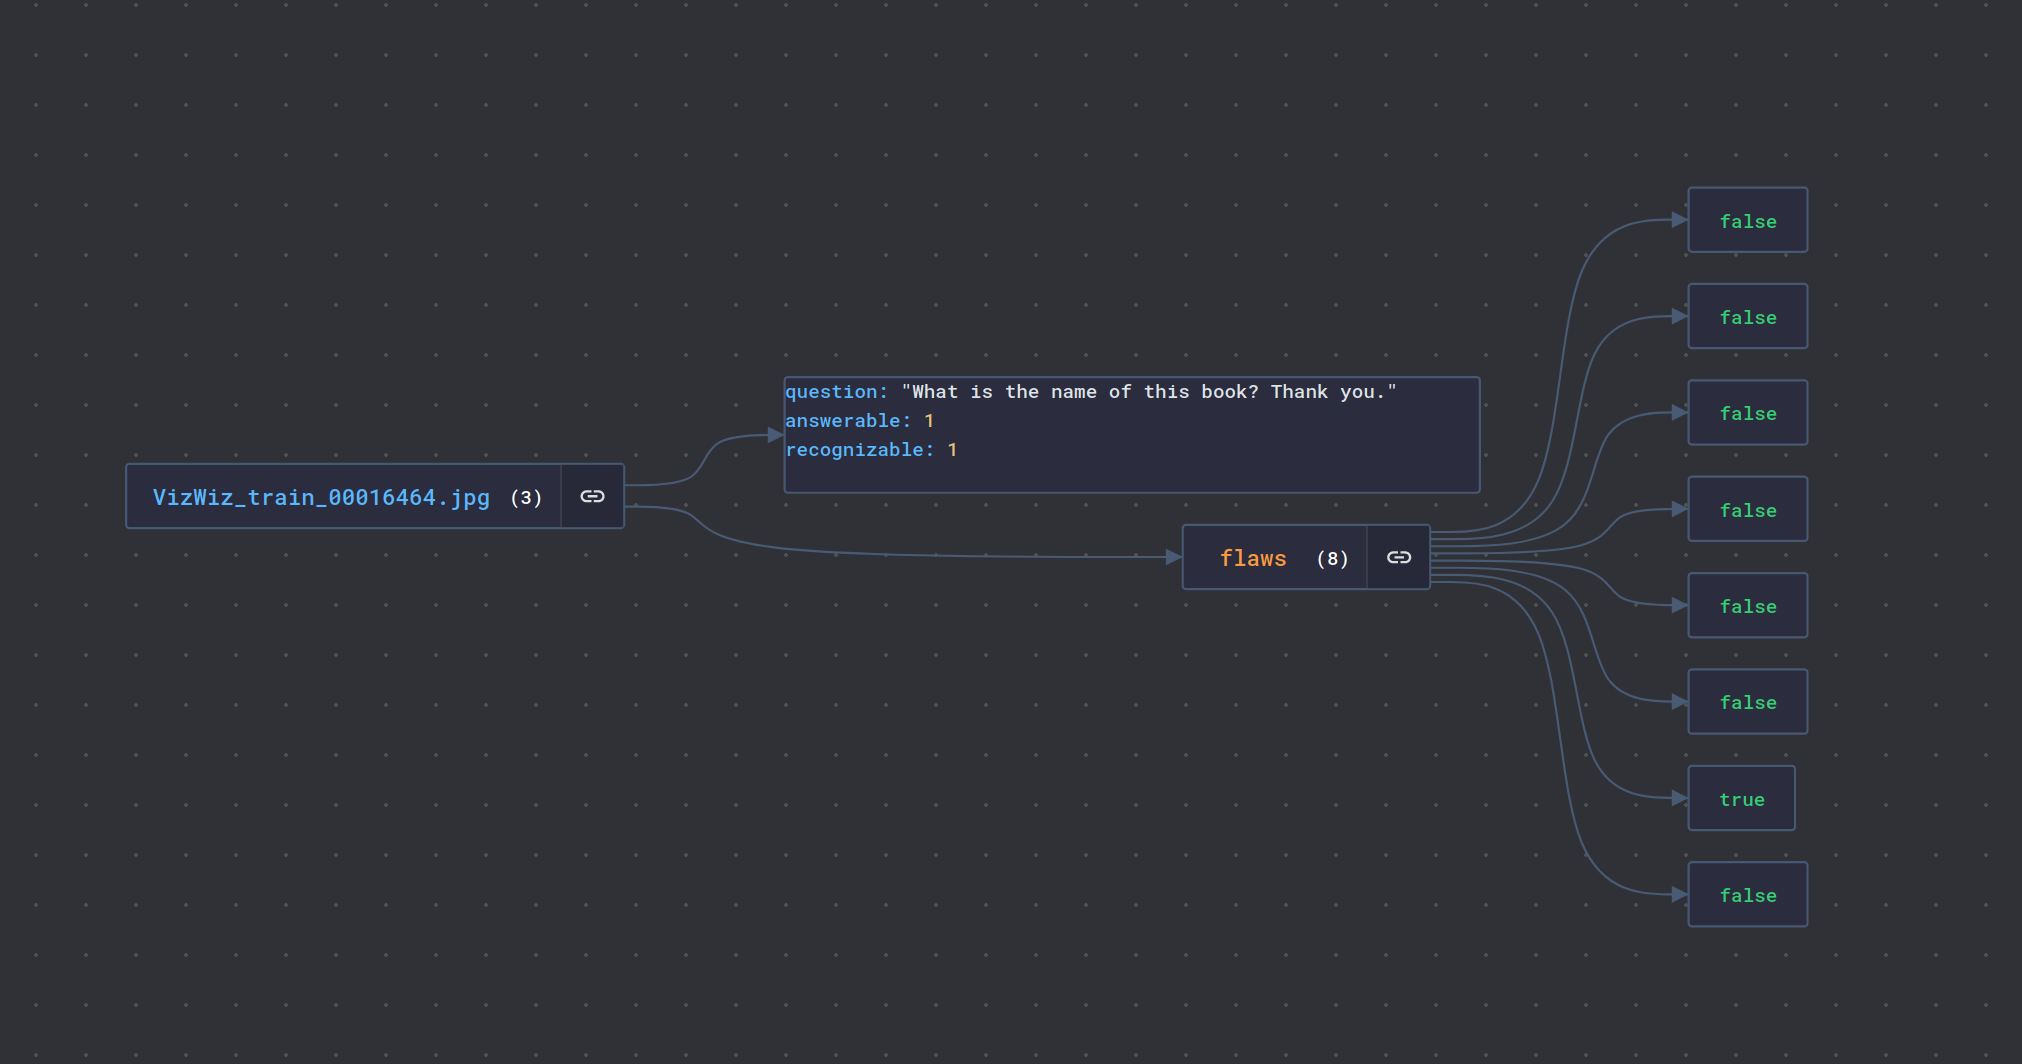
</div>

where `VizWiz_train_00016464.jpg` would be the key (image name) and the value would be the rest of the metadata

In [2]:
import json
import easyocr
import cv2
import matplotlib.pyplot as plt
import pprint
import numpy as np
import pprint

Read the json file. This file contains images that have text in it.

In [3]:
with open(f'../../data/imgs_w_txt_val.json') as user_file:
    j_imgs_w_txt = json.load(user_file)

For every image containing text, extract OCR info and add it to the previous json image metadata file. Save this data to a new json file.

In [4]:
%%time

imgs_w_txt_ocr = j_imgs_w_txt.copy()
imgs_dir = '/media/arnau/PEN/TFG/val/'
reader = easyocr.Reader(['en'], gpu=True)

# Add ocr data to the metadata of each img
for img, img_info in imgs_w_txt_ocr.items():
    ocr_result = reader.readtext(imgs_dir + img)
    ocr_info = { 
                "text" : list(map(lambda x: x[1], ocr_result)),
                 "bboxs" : list(map(lambda x: x[0], ocr_result)),
                 "acc" : list(map(lambda x: x[2], ocr_result))
                }
    img_info["ocr"] = ocr_info
    imgs_w_txt_ocr[img] = img_info

        
def convert(o):
    if isinstance(o, np.int64): return int(o)  
    raise TypeError

with open('../../data/imgs_w_txt_val_ocr.json', 'w') as outfile:
    json.dump(imgs_w_txt_ocr, outfile, default=convert)

CPU times: user 4min 8s, sys: 11.2 s, total: 4min 19s
Wall time: 3min 43s


Sample item from resultin json:

In [5]:
key = next(iter(imgs_w_txt_ocr))
value = imgs_w_txt_ocr[next(iter(imgs_w_txt_ocr))]
print(f"\nKey: {key}")
print(f"\nValue: \n")
pprint.pprint(value)


Key: VizWiz_val_00004134.jpg

Value: 

{'answerable': 1.0,
 'flaws': [False, False, False, False, False, False, True, False],
 'ocr': {'acc': [1.0,
                 0.9999415883011267,
                 0.977084709905858,
                 0.9977160635021534,
                 0.9999988079074598,
                 0.989552007646009,
                 0.6429262137219064,
                 0.5066116723874053,
                 0.9689590542959401,
                 0.9804605302817307,
                 0.9930245943678032,
                 0.9860002983595764,
                 0.8905621767044067,
                 0.9789385886100047,
                 0.7261683191995055,
                 0.9992289543151855,
                 0.9999104142189026,
                 0.9990262616501503,
                 0.9475000074017146,
                 0.99855637550354],
         'bboxs': [[[420, 350], [474, 350], [474, 398], [420, 398]],
                   [[534, 364], [586, 364], [586, 414], [534, 414]],
             

# Adding Google Vision OCR tokens to test data

In [1]:
from google.cloud import storage

def authenticate_implicit_with_adc(project_id="your-google-cloud-project-id"):
    """
    When interacting with Google Cloud Client libraries, the library can auto-detect the
    credentials to use.

    // TODO(Developer):
    //  1. Before running this sample,
    //  set up ADC as described in https://cloud.google.com/docs/authentication/external/set-up-adc
    //  2. Replace the project variable.
    //  3. Make sure that the user account or service account that you are using
    //  has the required permissions. For this sample, you must have "storage.buckets.list".
    Args:
        project_id: The project id of your Google Cloud project.
    """

    # This snippet demonstrates how to list buckets.
    # *NOTE*: Replace the client created below with the client required for your application.
    # Note that the credentials are not specified when constructing the client.
    # Hence, the client library will look for credentials using ADC.
    storage_client = storage.Client(project=project_id)
    buckets = storage_client.list_buckets()
    print("Buckets:")
    for bucket in buckets:
        print(bucket.name)
    print("Listed all storage buckets.")

ModuleNotFoundError: No module named 'google'

In [ ]:
pid = "primal-result-377212"
authenticate_implicit_with_adc(project_id=pid)

In [ ]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    
    texts = response.text_annotations
    texts = [text.description for text in texts]
    
    """
    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))
    """
    
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

    return texts

In [ ]:
import json
import random
import matplotlib.pyplot as plt
import cv2

direc = 'E:\TFG'
imgs_dir = r"E:\TFG\val"

with open(direc + './imgs_w_txt_val_ocr.json') as user_file:
    imgs_w_txt_val_ocr = json.load(user_file)

In [ ]:
imgs_w_txt_val_ocr

In [ ]:
for i, img in enumerate(imgs_w_txt_val_ocr):
    full_img = imgs_dir + "\\" + imgs_w_txt_val_ocr[i]
    google_result = detect_text(full_img)
    